In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from tqdm import tqdm

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\ismail\anaconda3\envs\data_analysis_with_python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


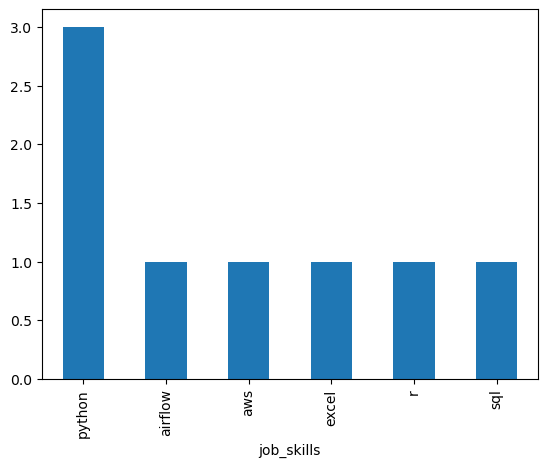

In [4]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind='bar')
plt.show()

In [5]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."


In [6]:
df_exploded = df.explode('job_skills')

In [7]:
df_exploded.groupby(['job_title_short','job_skills']).size()

job_title_short    job_skills                       
Business Analyst   ['airflow', 'flow']                  1
                   ['airflow']                          2
                   ['airtable']                         1
                   ['alteryx', 'excel', 'power bi']     1
                   ['alteryx', 'excel']                 2
                                                       ..
Software Engineer  ['xamarin', 'ionic', 'windows']      1
                   ['xamarin', 'node', 'git', 'svn']    1
                   ['xamarin']                          1
                   ['yarn']                             2
                   ['zoom']                             8
Length: 215220, dtype: int64

In [8]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills                       
Business Analyst   ['airflow', 'flow']                  1
                   ['airflow']                          2
                   ['airtable']                         1
                   ['alteryx', 'excel', 'power bi']     1
                   ['alteryx', 'excel']                 2
                                                       ..
Software Engineer  ['xamarin', 'ionic', 'windows']      1
                   ['xamarin', 'node', 'git', 'svn']    1
                   ['xamarin']                          1
                   ['yarn']                             2
                   ['zoom']                             8
Length: 215220, dtype: int64

In [9]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
19078,Data Analyst,['excel'],8095
49382,Data Analyst,['sql'],4997
136380,Data Scientist,['python'],4659
35354,Data Analyst,"['sql', 'excel']",3020
1233,Business Analyst,['excel'],2443
...,...,...,...
12,Business Analyst,"['alteryx', 'tableau', 'power bi', 'excel']",1
13,Business Analyst,"['alteryx', 'tableau', 'power bi', 'looker']",1
14,Business Analyst,"['alteryx', 'tableau', 'qlik']",1
19,Business Analyst,"['angular', 'excel', 'tableau']",1


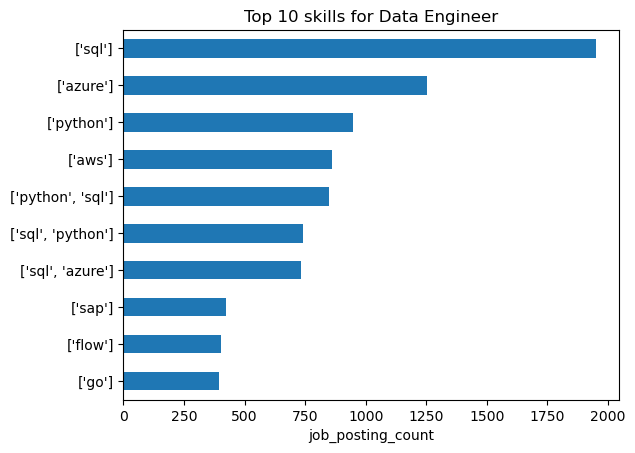

In [17]:
job_title = 'Data Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.title(f'Top {top_skills} skills for {job_title}')
plt.gca().invert_yaxis()
plt.xlabel('job_posting_count')
plt.ylabel('')
plt.legend().set_visible(False)
